# Notes

## ```Example 1 (System of 1st Order ODE)```

System of ODE is common in application in order to model a complicated phenomenon. Actually we may treat the problem as solving a matrix which each row is a simple 1st order IVP.

Suppose we are going to solve the following system for $x_1(t)$ and $x_2(t)$.

$$\left\{\begin{align*}
x_1' &= x_1 + x_2^2 + 3t \\
x_2' &= 3x_1 + x_2^3 - \cos(t) \\
x_1(0) &= 0 \\
x_2(0) &= 0 \\
\end{align*}\right.$$

Actually the system can be expressed in the following matrix form.

$$
X' =
\begin{bmatrix} x_1' \\ x_2' \end{bmatrix} =
\begin{bmatrix}  x_1 + x_2^2 + 3t \\ 3x_1 + x_2^3 - \cos(t) \end{bmatrix}
$$

Then we may repeat the steps in **"First Order Differential Equation"** to solve the solution matrix $X$ in the interval $0 \leq t \leq 1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint

In [ ]:
def dXdt(t, X):
    x1, x2 = X      # The variables in the matrix X that we are going to solve for.
    return [x1 + x2**2  + 3*t,
           3*x1 + x2**3 - np.cos(t)]
x1_0 = 0
x2_0 = 0
X_0 = (x1_0, x2_0)

In [ ]:
t = np.linspace(0, 1, 100)
sol = odeint(dXdt, X_0, t, tfirst=True)

In [ ]:
x1_sol = sol.T[0]     # sol.T is a matrix with two rows, the first one is the approximation of x1
x2_sol = sol.T[1]     # the second row is the approximation of x2

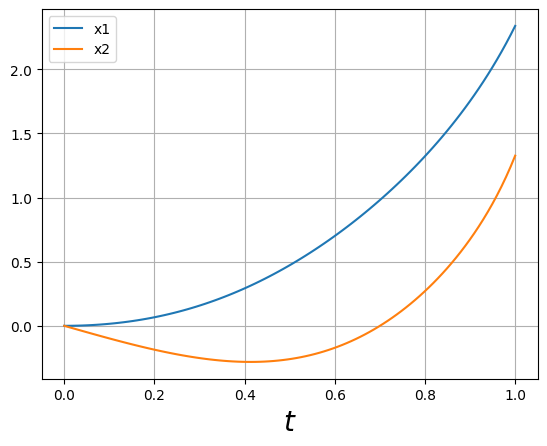

In [ ]:
plt.plot(t, x1_sol, label = 'x1')
plt.plot(t, x2_sol, label = 'x2')
plt.xlabel('$t$', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## ```Example 2 (Higher Order IVP)```

Any higher order IVP can be expressed as a system of 1st order IVP. Then we may use the previous methods to solve the orginal problem.

Suppose we need to solve the following 2nd order IVP.

$$x'' = -(x')^2 + \sin(x)$$

We may express this equation into the following by defining two new functions $x_1 = x$ and $x_2 = x'$.

$$
\left\{\begin{align*}
x_1' &= x_2 \\
x_2' &= -(x_2)^2 + \sin(x_1)
\end{align*}\right.
$$

We may observe that a 2nd order differential equation can be expressed as two 1st order differential equations. In general,
* **_defining new variables to replace degree 0 to degree $(n-1)$ derivative_**
* **_$n$-th order differential equation can be expressed as $n$ first order differential equations_**

Let's solve the following example in the interval $0 \leq t \leq 1$.

$$
\left\{\begin{align*}
x'' &= -(x')^2 + \sin(x) \\
x(0) &= 0 \\
x'(0) &= 5
\end{align*}\right.
$$

### _Step 1: Transform the Higher Order IVP into System of 1st Order IVP_

Let $x_1 = x$ and $x_2 = x'$. Then the 2nd order IVP becomes

$$
\left\{\begin{align*}
x_1' &= x_2 \\
x_2' &= -(x_2)^2 + \sin(x_1) \\
x_1(0) &= 0 \\
x_2(0) &= 5
\end{align*}\right.
$$

### _Step 2: Solve the IVP using Python_

In [ ]:
def dXdt(t, X):
    x1, x2 = X
    return [x2,
           -x2**2 + np.sin(x1)]
x1_0 = 0
x2_0 = 5
X_0 = (x1_0, x2_0)

In [ ]:
t = np.linspace(0, 1, 100)
sol = odeint(dXdt, X_0, t, tfirst=True)

In [ ]:
x1_sol = sol.T[0]    # approximated values of x(t) from t=0 to t=1
x2_sol = sol.T[1]   # approximated values of x'(t) from t=0 to t=1

### _Step 3: Plot the solution_

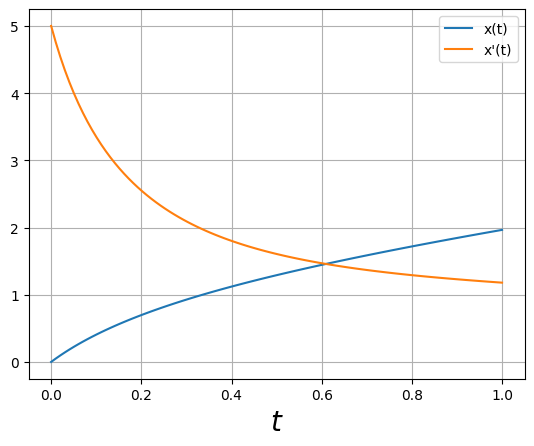

In [ ]:
plt.plot(t, x1_sol, label = 'x(t)')
plt.plot(t, x2_sol, label = "x'(t)")
plt.xlabel('$t$', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# Exercise

1. Find the numerical approximation of the following 2nd order IVP for the solution $y(t)$ in the interval $0\leq t \leq 1$.

$$
\left\{\begin{align*}
y'' + y' &= ty \\
y(0) &= 0 \\
y'(0) &= -2
\end{align*}\right.
$$

2. Find the numerical approximation of the following 3rd order IVP for the solution $y(t)$ in the interval $2\leq t \leq 2.5$.

$$
\left\{\begin{align*}
(\sin(t))y''' + \cos(ty) + \sin(t^2 + y'') + (y')^4 &= \ln(t)\\
y(2) &= 7 \\
y'(2) &= 3 \\
y''(2) &= -4
\end{align*}\right.
$$

3. Find the numerical approximation of $x(t)$ and $y(t)$ from the following system of differential equations in the interval $0 \leq t \leq 0.2$.

$$
\left\{\begin{align*}
x'(t) &= x + y^2 -t^3 \\
y'(t) &= y + x^3 + \cos(t) \\
x(0) &= -6 \\
y(0) &= 5
\end{align*}\right.
$$

4. Let's take a closer look at the situation of the baleen whales and Antarctic krill.

   The whales eat the krill, and the krill live on the plankton in the sea.If the whales eat so many krill that the krill cease to be abundant, the food supply of the whales is greatly reduced. Then the whales will starve or leave the area in search of a new supply of krill. As the population of baleen whales dwindles, the krill population makes a comeback because not so many of them are being eaten. As the krill population increases, the food supply for the whales grows and, consequently, so does the baleen whale population. Also, more baleen whales are eating increasingly more krill again.


<img src='https://drive.google.com/uc?id=1S16ih6eqJiJX01KfDkQbgzhzgOydKr2O'>


(a) Given the initial conditions $x(0) = 1$ and $y(0) = 2$. The model parameters are $a = 3$, $b = 1$, $m = 2$ and $n = 1$. Estimate the values of $x(t)$ and $y(t)$ from $0 \leq t \leq 8$ and plot the graph of $x(t)$ and $y(t)$ against $t$ in the same figure. You may generate more than 100 points from 0 to 8 to decrease the approximation error, example using 1000 points. What properties of the functions $x(t)$ and $y(t)$ have you found?

(b) Plot the graph "$y$ against $x$", the point $(0,0)$ and $(\frac{m}{n}, \frac{a}{b})$. Observe the location of the two points and the curve.

#### ```Enrichment```

Finding **equilibrium points** is a common analysis technique when dealing with system of differential equations models. Suppose we have the following system.

$$
\left\{\begin{align*}
x_1'(t) &= f_1(t, x_1, \dots, x_n) \\
\vdots \\
x_n'(t) &= f_n(t, x_1, \dots, x_n)
\end{align*}\right.
$$

The equilibrium points are the points $(x_1(t^*), \dots, x_n(t^*))$ such that $x_1' = \dots = x_n' = 0$. In the krill and whale example, we have $x'(t) = y'(t) = 0$ when $(x(t), y(t)) = (0,0)$ or $(\frac{m}{n}, \frac{a}{b})$. The second steps to analyze is determining the equilibrium points as **stable**, **asymptotically stable** or **unstable**. You may search for the method or ask AI "How to determine the types of equilibrium points of a system of differential equations?" for your interest. The method should involving eigenvalues.

In this case, both $(0,0)$ and $(\frac{m}{n}, \frac{a}{b})$ are unstable equilibrium points. The elliptic shape of the graph "$y$ against $x$" is due to the periodic property of $x(t)$ and $y(t)$.